In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [78]:
df=pd.read_csv('drug200 (1).csv')
df
data=df.copy()

In [79]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [80]:
print(df.isnull().any())

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool


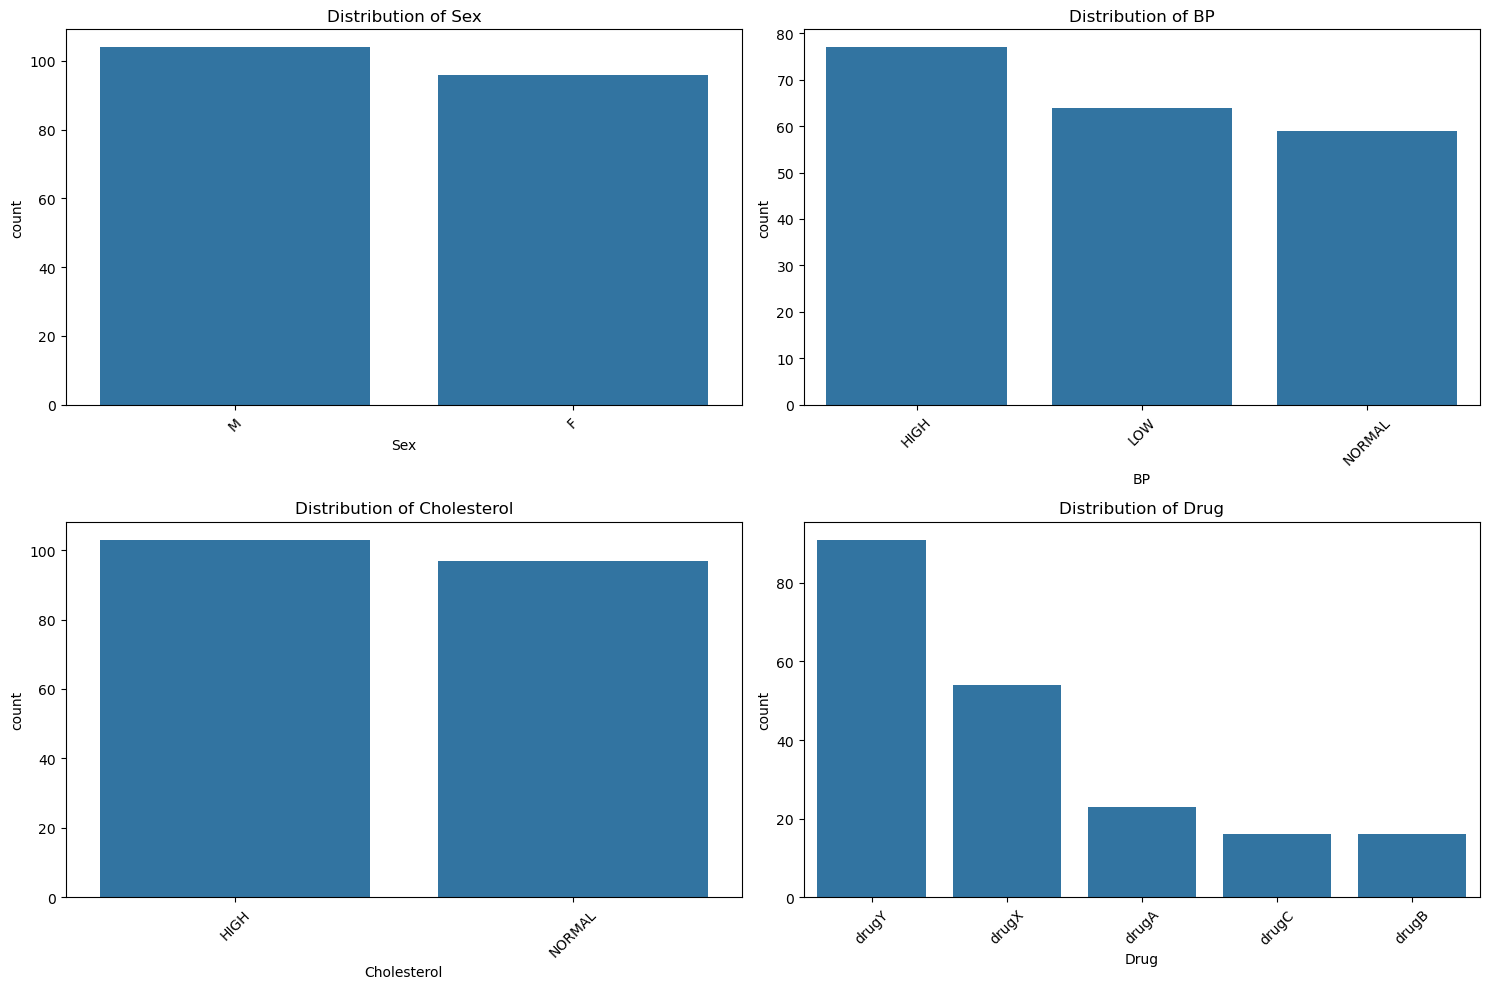

In [81]:
categorical_cols= ['Sex', 'BP', 'Cholesterol', 'Drug']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [82]:
le = LabelEncoder()
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df[col] = le.fit_transform(df[col])
    

In [83]:
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


In [84]:
from sklearn.model_selection import train_test_split
x = df.copy().drop(['Drug'], axis=1)
y=df['Drug']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6)

In [85]:
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1            0   12.006     2
197   52    1   2            0    9.894     3
198   23    1   2            1   14.020     3
199   40    0   1            1   11.349     3

[200 rows x 6 columns]


In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=20,splitter='best',min_samples_leaf=10)
clf=clf.fit(x_train,y_train)

In [87]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [88]:
pred=clf.predict(x_test)
pred

array([4, 3, 3, 4, 4, 3, 3, 3, 0, 3, 4, 4, 3, 3, 3, 4, 4, 1, 1, 4, 4, 3,
       3, 0, 4, 3, 1, 0, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 4, 4, 3, 3, 0, 4, 3,
       1, 3, 4, 4, 4, 4, 0, 1, 4, 0, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3,
       3, 4, 3, 4, 4, 3, 4, 4, 3, 0, 4, 4, 3, 3, 4, 4, 1, 4, 0, 3, 4, 4,
       3, 3, 3, 4, 4, 4, 3, 3, 4, 4])

In [89]:
clf.predict_proba(x_test)


array([[0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.45454545, 0.54545455, 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.45454545, 0.54545455, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.45454545, 0.54545455, 0.        ],
       [0.        , 0.        , 0.45454545, 0.54545455, 0.        ],
       [0.        , 0.        , 0.

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9

In [91]:
clf.score(x_test,y_test)



0.9

In [92]:

df['Drug'].unique()


array([4, 2, 3, 0, 1])

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred,labels=[4,2,3,0,1])

array([[60,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0, 32,  0,  0],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  0,  0,  8]])

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.89      1.00      0.94         8
           2       0.00      0.00      0.00        11
           3       0.74      1.00      0.85        32
           4       1.00      1.00      1.00        60

    accuracy                           0.90       120
   macro avg       0.73      0.78      0.75       120
weighted avg       0.83      0.90      0.86       120



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
pred_train=clf.predict(x_train)
print(classification_report(y_train, pred_train))


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.80      1.00      0.89         8
           2       0.00      0.00      0.00         5
           3       0.81      1.00      0.90        22
           4       1.00      1.00      1.00        31

    accuracy                           0.91        80
   macro avg       0.72      0.77      0.74        80
weighted avg       0.87      0.91      0.88        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
